In [11]:
# ROTHANA'S CHARTS AND GRAPHS (Exploratory Data Analysis)
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import and read intended csv file
csvfile = "resources/IMDB Horror movies.csv"
horror_data = pd.read_csv(csvfile)


In [12]:
# Adding month and year columns
horror_data['Release Year'] = pd.DatetimeIndex(horror_data['Release Date']).year
horror_data['Release Month'] = pd.DatetimeIndex(horror_data['Release Date']).month_name().str.slice(stop=3)

# Reorganizing columns
horror_data = horror_data[["Title", "Genres", "Release Date", "Release Year", "Release Month", "Release Country",
                          "Movie Rating", "Review Rating", "Movie Run Time", "Language", "Plot", "Cast", "Filming Locations", 
                          "Budget"]]

# Cleaning the data to remove columns not being used
cd = horror_data.drop(columns=["Plot", "Cast", "Filming Locations", "Budget"])
cd.head()

# Create a CSV with the Clean DataFrame (cd)
cd.to_csv("output/clean_data(RK).csv", index=False)

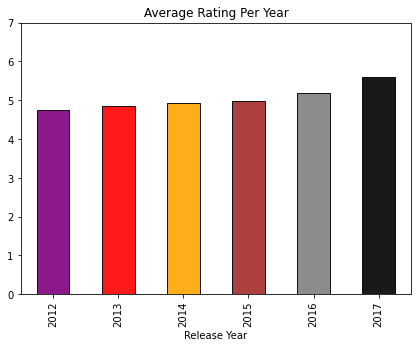

In [13]:
# What is the change in average ratings between 2012 and 2017?
#=============================================================

# Graphing Average Ratings for Per Year (AY)
AY = cd.groupby(["Release Year"]).mean()["Review Rating"]
colors=["purple", "red", "orange", "brown", "gray", "black"]
AY.plot(kind ='bar', title="Average Rating Per Year", color=colors,
        ylim=(0, 7), figsize=(7, 5), align='center', alpha=0.90, edgecolor='black')
plt.savefig('output/AveRateGraph')

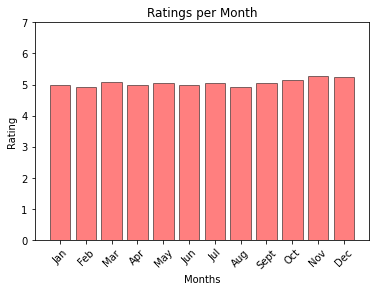

Release Month
Apr    4.977470
Aug    4.935747
Dec    5.075000
Feb    4.981106
Jan    5.037197
Jul    4.984163
Jun    5.043204
Mar    4.918548
May    5.042079
Nov    5.149223
Oct    5.271538
Sep    5.238291
Name: Review Rating, dtype: float64

In [14]:
# Which release month is the most popular for each country in the data set?
#==========================================================================
#Graphing
x_axis = cd["Release Month"].unique()
x_axis.sort()
y = cd.groupby(["Release Month"]).mean()["Review Rating"]
colors = ['red', ]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sept', 'Oct', 'Nov', 'Dec']

plt.bar(x_axis, y, color=colors, edgecolor='black', tick_label=(months), alpha=0.5)
plt.title('Ratings per Month')
plt.xlabel('Months')
plt.xticks(rotation = 45)
plt.ylabel('Rating')
plt.ylim(0, 7)
plt.show()
y

In [15]:
# Identify Movies with the highest rating
highest_rate = cd[cd['Review Rating'] == cd['Review Rating'].max()]
highest_rate

,Title,Genres,Release Date,Release Year,Release Month,Release Country,Movie Rating,Review Rating,Movie Run Time,Language
2569,Bonehill Road (2017),Horror,27-Oct-17,2017,Oct,USA,NaN,9.8,NaN,English


In [16]:
# Identify Movies with the lowest rating
lowest_rate = cd[cd['Review Rating'] == cd['Review Rating'].min()]
lowest_rate

,Title,Genres,Release Date,Release Year,Release Month,Release Country,Movie Rating,Review Rating,Movie Run Time,Language
1499,Countrycide (2017),Horror,8-Sep-17,2017,Sep,USA,NaN,1.0,NaN,English
1691,Una Comedia Macabra (2017),Comedy| Horror,21-Sep-17,2017,Sep,Peru,NaN,1.0,91 min,Spanish


In [9]:
arr = cd.groupby(["Release Country"])['Release Month'].value_counts()#.max(level=0)
ar = pd.DataFrame(arr)
ar

Release Month
Release Country Release Month               
Argentina       Mar                        3
                Apr                        2
                Feb                        2
                Jan                        2
                Dec                        1
...                                      ...
Vietnam         Feb                        1
                Jan                        1
                Jul                        1
                May                        1
                Sep                        1

[385 rows x 1 columns]